PLOTS:
1. Number of ratings per ratings(1-5)  
2. Plots per user side information(Age, Occupation, etc)   
3. User side information distibution (How many user we have per category)  
4. Movies example 

# Import Movie Data

In [2]:
import pandas as pd

movies = pd.read_pickle("D:/University/Edinburgh/Dissertation/data/data_after_process.pkl")

Maximum Length words in the combination of movie title and movie description 

In [3]:
movie_descr =  movies["title"] + movies["overview"]

First 10 rows of the movie dataset

In [4]:
movies.head(10)

,tmdbId,imdb_id,title,overview,movieId,imdbId,path
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1,114709,114709.jpg
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,2,113497,113497.jpg
2,15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,3,113228,113228.jpg
3,31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",4,114885,114885.jpg
4,11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,5,113041,113041.jpg
5,949,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",6,113277,113277.jpg
6,11860,tt0114319,Sabrina,An ugly duckling having undergone a remarkable...,7,114319,114319.jpg
7,9091,tt0114576,Sudden Death,International action superstar Jean Claude Van...,9,114576,114576.jpg
8,710,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,10,113189,113189.jpg
9,9087,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",11,112346,112346.jpg


In [5]:
length_movie_description = movie_descr.str.split("\\s+")

print("Max number of words of all the movie descriptions = ", length_movie_description.str.len().max())
print("Index = ", length_movie_description.str.len().idxmax())

Max number of words of all the movie descriptions =  185
Index =  4630


Show case of the first 20 movie poster with their titles

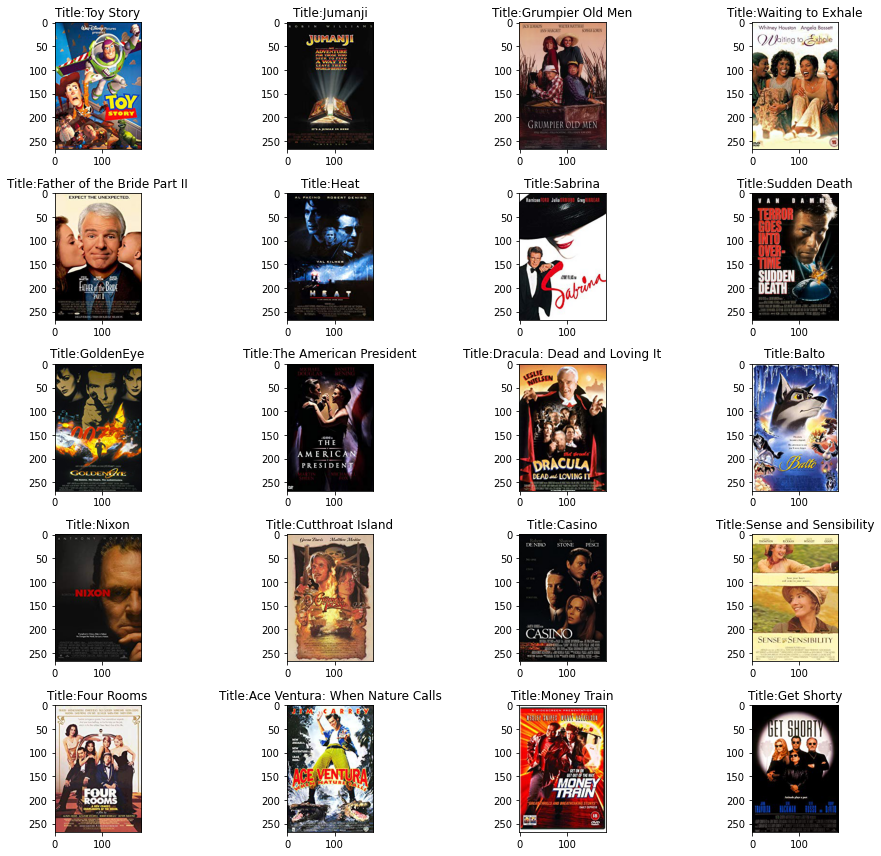

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# settings
h, w = 10, 10        # for raster image
nrows, ncols = 5, 4  # array of sub-plots
figsize = [14, 12]     # figure size, inches


# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    #read image path and the image
    img_path = "D:/University/Edinburgh/Dissertation/data/poster_downloads/" + movies["path"][i]
    img = plt.imread(img_path)
    axi.imshow(img)
    # image title
    axi.set_title("Title:"+str(movies.title.iloc[i]))



plt.tight_layout()
plt.show()

# User data

In [7]:
import pandas as pd
user_df =pd.read_csv("D:/University/Edinburgh/Dissertation/data/movielens/users.dat",sep="::",header=None)

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [8]:
user_df.rename(columns={0: "userId", 1: "gender", 2: "age", 3: "occupation", 4: "postcode"}, inplace=True)

In [9]:
user_df.loc[user_df['age'] ==1, 'Age Group'] = 'Under 18'
user_df.loc[user_df['age'] ==18, 'Age Group'] = '18-24'
user_df.loc[user_df['age'] ==25, 'Age Group'] = '25-34'
user_df.loc[user_df['age']==35, 'Age Group'] = '35-44'
user_df.loc[user_df['age'] ==45, 'Age Group'] = '45-49'
user_df.loc[user_df['age'] ==50, 'Age Group'] = '50-55'
user_df.loc[user_df['age']==56, 'Age Group'] = '56+'

In [10]:
user_df.head()

,userId,gender,age,occupation,postcode,Age Group
0,1,F,1,10,48067,Under 18
1,2,M,56,16,70072,56+
2,3,M,25,15,55117,25-34
3,4,M,45,7,02460,45-49
4,5,M,25,20,55455,25-34


make sure that all the users have side information

In [11]:
#all the user have full data
user_df.isna().sum()

userId        0
gender        0
age           0
occupation    0
postcode      0
Age Group     0
dtype: int64

## Plots

### User count per age group

<AxesSubplot:xlabel='Age Group', ylabel='count'>

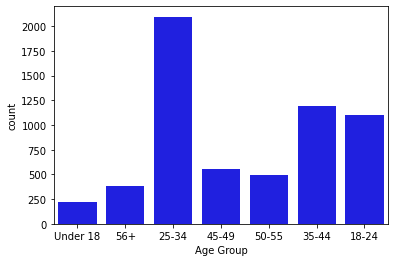

In [12]:
import seaborn as sns
sns.countplot(x='Age Group',data=user_df,color='blue')

### User count per occupation

<AxesSubplot:xlabel='occupation', ylabel='count'>

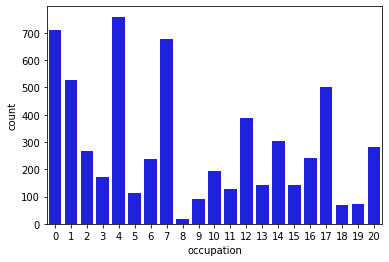

In [13]:
sns.countplot(x='occupation',data=user_df,color='blue')

### User count per gender

<AxesSubplot:xlabel='gender', ylabel='count'>

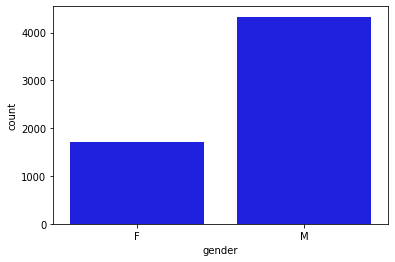

In [14]:
sns.countplot(x='gender',data=user_df,color='blue')

### User count per age group and gender

[Text(0.5, 1.0, 'Number of unique user per age group and gender')]

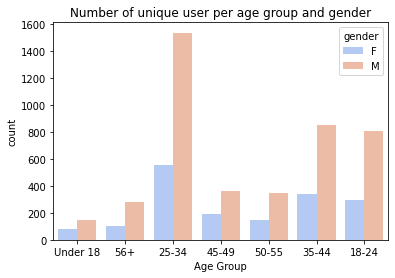

In [15]:
sns.countplot(x='Age Group',data=user_df,hue = "gender",palette='coolwarm').set(title = "Number of unique user per age group and gender")

### User count per occupation and gender

[Text(0.5, 1.0, 'Number of unique user per occupation and gender')]

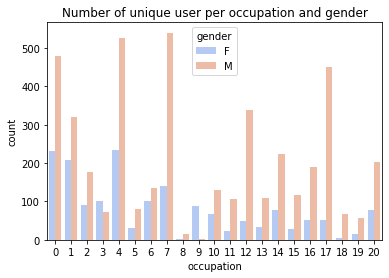

In [16]:
sns.countplot(x='occupation',data=user_df,hue = "gender",palette='coolwarm').set(title = "Number of unique user per occupation and gender")

# Import Ratings

## Process the ratings
Combine all the rating files  
Drop all the duplicates  
Remove all the ratings for which we don't have user data or movie data  
Sort it by timestamp

In [17]:
import pandas as pd
# user_df =pd.read_csv("D:/University/Edinburgh/Dissertation/data/movielens/users.dat",sep="::",header=None)
ratings_df1 = pd.read_csv("D:/University/Edinburgh/Dissertation/data/movielens/ratings.dat",sep="::",header=None)
ratings_df1.rename(columns={0: "userId", 1: "movieId", 2: "rating", 3: "timestamp"}, inplace=True)
ratings_df2 = pd.read_csv("D:/University/Edinburgh/Dissertation/Data/ml-20m/ratings.csv")
ratings_df3 = pd.read_csv("D:/University/Edinburgh/Dissertation/Data/ratings.csv")

ratings_df = pd.concat([ratings_df1, ratings_df2, ratings_df3], ignore_index=True) 

ratings_df.drop_duplicates(inplace=True)

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
print(f"Number of ratings after combining all the rating files {len(ratings_df):,}")

Number of ratings after combining all the rating files 47,024,761


In [19]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1193,5.0,978300760
1,1,661,3.0,978302109
2,1,914,3.0,978301968
3,1,3408,4.0,978300275
4,1,2355,5.0,978824291


In [20]:
movies_ratings = set(ratings_df.movieId)
print("Number of unique movies in the ratings df after the movie removal", len(movies_ratings))
movies_ratings_df = list(movies_ratings & set(movies.movieId))
print("The size of union between the movie df (includes movies metadata) and the ratings_df:", len(movies_ratings_df))

#keep only the ratings that the user id has side information 
ratings_movie_df = ratings_df.loc[ratings_df["movieId"].isin(movies_ratings_df)]

print("The total number of ratings after removing movies that we don't have poster and user that we don't have side information:", len(ratings_movie_df))

Number of unique movies in the ratings df after the movie removal 45161
The size of union between the movie df (includes movies metadata) and the ratings_df: 8957
The total number of ratings after removing movies that we don't have poster and user that we don't have side information: 35374731


In [21]:
user_ratings = set(ratings_movie_df.userId)
print("Number of unique user in the ratings df after the movie removal", len(user_ratings))
user_ratings_df = list(user_ratings & set(user_df.userId))
print("The size of union between the user df (includes user side information) and the ratings_df:", len(user_ratings_df))

# keep only the ratings that the user id has side information 
ratings_user_df = ratings_movie_df.loc[ratings_movie_df["userId"].isin(user_ratings_df)]

print("The total number of ratings after removing movies that we don't have poster and user that we don't have side information:", len(ratings_user_df))

Number of unique user in the ratings df after the movie removal 269409
The size of union between the user df (includes user side information) and the ratings_df: 6040
The total number of ratings after removing movies that we don't have poster and user that we don't have side information: 2020157


In [22]:
ratings_user_df.sort_values(by="timestamp", inplace=True)
# ratings_user_df.to_pickle("D:/University/Edinburgh/Dissertation/Data/ratings_updated.pkl")

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
print(f"Final number of ratings after processing {len(ratings_user_df):,}")

Final number of ratings after processing 2,020,157


In [24]:
ratings_user_df.head()

,userId,movieId,rating,timestamp
1729638,4864,17,5.0,825499934
1729636,4864,11,5.0,825499934
1729635,4864,10,3.0,825499934
1729653,4864,79,1.0,825499934
1729637,4864,14,4.0,825499935


In [25]:
print(f"Number of unique users after processing the ratings {len(ratings_user_df.userId.unique())}")

Number of unique users after processing the ratings 6040


In [26]:
print(f"Number of unique movies after processing the ratings {len(ratings_user_df.movieId.unique())}")

Number of unique movies after processing the ratings 7861


In [27]:
#save it to a stasts file

statistics = {"#_users": len(ratings_user_df.userId.unique()), "#_movies": len(ratings_user_df.movieId.unique()), "#_ratings": len(ratings_user_df)}
statistics_df = pd.Series(statistics)
# statistics_df.to_pickle("final_dataset_stats")
statistics_df

#_users         6040
#_movies        7861
#_ratings    2020157
dtype: int64

## Create user distibution for ratings 

In [28]:
user_distribution = ratings_user_df.groupby(['userId'])['userId'].count().reset_index(name='counts')

In [29]:
user_distribution.head()

,userId,counts
0,1,205
1,2,185
2,3,214
3,4,98
4,5,252


find the maximum number of ratings that a user gave

In [30]:
user_distribution.loc[user_distribution["counts"] == user_distribution["counts"].max()]

,userId,counts
740,741,3503


In [31]:
user_distribution.iloc[740]

userId     741
counts    3503
Name: 740, dtype: int64

find the minimum number of ratings that a user gave

In [32]:
#maybe I could add some more ratings for each one of them 
#based on the paper they had a minimum of 10
user_distribution.loc[user_distribution["counts"] == user_distribution["counts"].min()]

,userId,counts
3635,3636,35


In [33]:
# see how many users has rating count less than 10
user_distribution.loc[user_distribution["counts"] <10]

,userId,counts


merge the user_df with the final ratings_df so we can make different plots 

In [34]:
user_rating_merge = user_df.merge(ratings_user_df, how='inner', on='userId')
user_rating_merge.head()

,userId,gender,age,occupation,postcode,Age Group,movieId,rating,timestamp
0,1,F,1,10,48067,Under 18,3186,4.0,978300019
1,1,F,1,10,48067,Under 18,1721,4.0,978300055
2,1,F,1,10,48067,Under 18,1270,5.0,978300055
3,1,F,1,10,48067,Under 18,1022,5.0,978300055
4,1,F,1,10,48067,Under 18,2340,3.0,978300103


In [35]:
len(user_rating_merge.userId.unique())

6040

Before plotting we check the movie distribution.  
There is a chance that will be a problem with the small amount of ratings that we have.

In [36]:
movie_distribution = ratings_user_df.groupby(['movieId'])['movieId'].count().reset_index(name='counts')
movie_distribution.loc[movie_distribution["counts"] <10]

,movieId,counts
87,98,9
96,109,2
114,130,3
117,134,6
121,138,8
...,...,...
7856,157869,1
7857,158137,1
7858,164614,1
7859,164631,1


[Text(0.5, 1.0, 'Number of ratings per category (1-5)')]

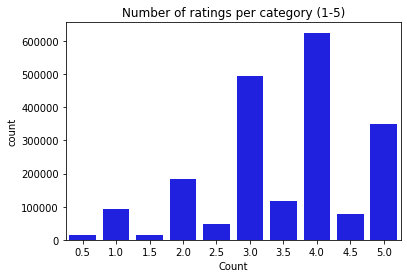

In [38]:
plot_rating_count = sns.countplot(x='rating',data=user_rating_merge,color='blue')
plot_rating_count.set_xlabel("Ratings")
plot_rating_count.set_xlabel("Count")
plot_rating_count.set(title = "Number of ratings per category (1-5)")

<AxesSubplot:xlabel='rating', ylabel='count'>

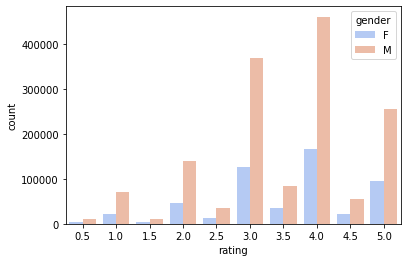

In [39]:
sns.countplot(x='rating',data=user_rating_merge,hue='gender',palette='coolwarm')

<AxesSubplot:xlabel='occupation', ylabel='count'>

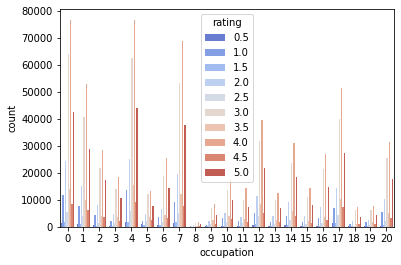

In [40]:
# I need somehow to make it look better
sns.countplot(x='occupation',data=user_rating_merge,hue='rating',palette='coolwarm')

<AxesSubplot:xlabel='rating', ylabel='count'>

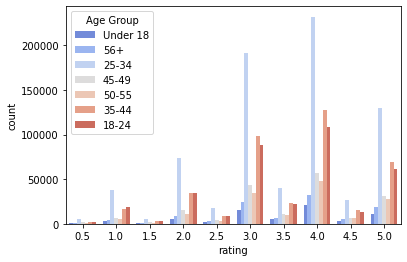

In [41]:
# I need somehow to make it look better
sns.countplot(x='rating',data=user_rating_merge,hue='Age Group',palette='coolwarm')

To do:  

1. Add some more ratings for the movies (not a priority since we care about the users)  

2. Add more movies with ratings in the dataset (Paper had approximately 10k we have approximately 7k) 

3. Make the plots clearer  
